## 1. Importing libraries

In [19]:
import pandas as pd  
import numpy as np    
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
from sklearn.compose import ColumnTransformer

In [20]:
dir(sklearn.preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 'TargetEncoder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 '_target_encoder',
 '_target_encoder_fast',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

# 2. Exploration

In [21]:
df = pd.DataFrame([
    ["green", "M", 10.1, "class2"],
    ["red", "L", 13.5, "class1"],
    ["blue", "XL", 15.3, "class2"]
])
df.columns = ["color", "size", "price", "classlabel"]
df2 = df.copy()
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [15]:
size_mapping = {"XL": 3, "L": 2, "M": 1}
df["size"] = df["size"].map(size_mapping)
df

,color,size,price,classlabel
0,green,NaN,10.1,class2
1,red,NaN,13.5,class1
2,blue,NaN,15.3,class2


In [16]:
class_mapping = {label: idx for idx, label in enumerate(df.classlabel.unique())}
df["classlabel"] = df["classlabel"].map(class_mapping)
df

,color,size,price,classlabel
0,green,NaN,10.1,0
1,red,NaN,13.5,1
2,blue,NaN,15.3,0


In [22]:
class_le = LabelEncoder()

In [23]:
class_le.fit_transform(df2["classlabel"])

array([1, 0, 1])

In [30]:
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder??

Init signature:
OrdinalEncoder(
    *,
    categories='auto',
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    unknown_value=None,
    encoded_missing_value=nan,
    min_frequency=None,
    max_categories=None,
)
Source:        
class OrdinalEncoder(OneToOneFeatureMixin, _BaseEncoder):
    """
    Encode categorical features as an integer array.

    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features are converted to ordinal integers. This results in
    a single column of integers (0 to n_categories - 1) per feature.

    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    For a comparison of different encoders, refer to:
    :ref:`sphx_glr_auto_examples_preprocessing_plot_target_encoder.py`.

    .. versionadded:: 0.20

    Parameters
    ----------
    categories : 'auto' or a list of array-like, default='auto'
        Categories

In [27]:
df2

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [35]:
df2.values

array([['green', 'M', 10.1, 'class2'],
       ['red', 'L', 13.5, 'class1'],
       ['blue', 'XL', 15.3, 'class2']], dtype=object)

In [ ]:
# Pandas has one hot encoding capabilities
df3 = pd.concat([pd.get_dummies(df2[["price", "color", "size"]]) * 1, df2[["classlabel"]]], axis=1)
df3

,price,color_blue,color_green,color_red,size_L,size_M,size_XL,classlabel
0,10.1,0,1,0,0,1,0,class2
1,13.5,0,0,1,1,0,0,class1
2,15.3,1,0,0,0,0,1,class2


In [47]:
df3.values

array([[10.1, 0, 1, 0, 0, 1, 0, 'class2'],
       [13.5, 0, 0, 1, 1, 0, 0, 'class1'],
       [15.3, 1, 0, 0, 0, 0, 1, 'class2']], dtype=object)

In [53]:
column_transformer = ColumnTransformer([
    ("label1", LabelEncoder(), [0]),
    ("onehot", OneHotEncoder(), [1]),
    ("nothing", 'passthrough', [2]),
    ("label2", LabelEncoder(), [3]),
])
column_transformer.fit_transform(X=df2, y=None).astype(float)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

### Sklearn datasets

In [55]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [143]:
datasets.load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [59]:
wine_data = datasets.load_wine()

In [60]:
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [63]:
wine_df = pd.DataFrame(wine_data["data"], columns = wine_data["feature_names"])
wine_df["target"] = wine_data["target"]

In [64]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [76]:
wine_df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [65]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# No Not null data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [96]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [120]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_df[wine_df.columns[:-1]], wine_df[["target"]], random_state=42, test_size=0.20)

In [74]:
(X_train.shape, X_test.shape)

((142, 13), (36, 13))

### Logistic Regression

In [107]:
make_pipeline?

Signature: make_pipeline(*steps, memory=None, verbose=False)
Docstring:
Construct a :class:`Pipeline` from the given estimators.

This is a shorthand for the :class:`Pipeline` constructor; it does not
require, and does not permit, naming the estimators. Instead, their names
will be set to the lowercase of their types automatically.

Parameters
----------
*steps : list of Estimator objects
    List of the scikit-learn estimators that are chained together.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the fitted transformers of the pipeline. The last step
    will never be cached, even if it is a transformer. By default, no
    caching is performed. If a string is given, it is the path to the
    caching directory. Enabling caching triggers a clone of the transformers
    before fitting. Therefore, the transformer instance given to the
    pipeline cannot be inspected directly. Use the attribute ``named_steps``
    or ``steps`` to inspect estima

In [97]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())

In [98]:
pipe_lr.fit(X_train.to_numpy(), Y_train.to_numpy())

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [99]:
pipe_lr.score(X_train, Y_train)

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.9507042253521126

In [100]:
pipe_lr.score(X_test, Y_test)

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1.0

In [121]:
pipe_lr.predict(X_test)

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [122]:
pipe_lr.predict_proba(X_test)

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[9.76349071e-01, 2.09001387e-02, 2.75079037e-03],
       [9.60571755e-01, 6.63312806e-03, 3.27951170e-02],
       [5.68983244e-03, 4.76820131e-02, 9.46628154e-01],
       [9.92616176e-01, 6.11281350e-03, 1.27101086e-03],
       [1.61756901e-03, 9.98294382e-01, 8.80493653e-05],
       [9.95356848e-01, 5.80071746e-04, 4.06308037e-03],
       [1.39486342e-03, 9.98182193e-01, 4.22944073e-04],
       [4.69591139e-03, 9.04503815e-04, 9.94399585e-01],
       [6.45687339e-02, 9.35216039e-01, 2.15227425e-04],
       [1.69632288e-02, 7.73654044e-02, 9.05671367e-01],
       [5.80358826e-01, 4.17630991e-01, 2.01018258e-03],
       [7.34769315e-03, 3.79434559e-04, 9.92272872e-01],
       [6.19861332e-01, 3.48431609e-01, 3.17070589e-02],
       [2.82776523e-03, 8.91316991e-01, 1.05855243e-01],
       [9.94889372e-01, 2.79594985e-03, 2.31467819e-03],
       [3.08620685e-03, 9.96325593e-01, 5.88199893e-04],
       [1.47875253e-03, 9.98125514e-01, 3.95733721e-04],
       [1.07186559e-03, 9.98632

In [125]:
confusion_matrix(Y_test, pipe_lr.predict(X_test))

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [104]:
standard_scaler = StandardScaler()

In [124]:
standard_scaler.fit_transform(X_train)

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

## Tree based

In [102]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: >

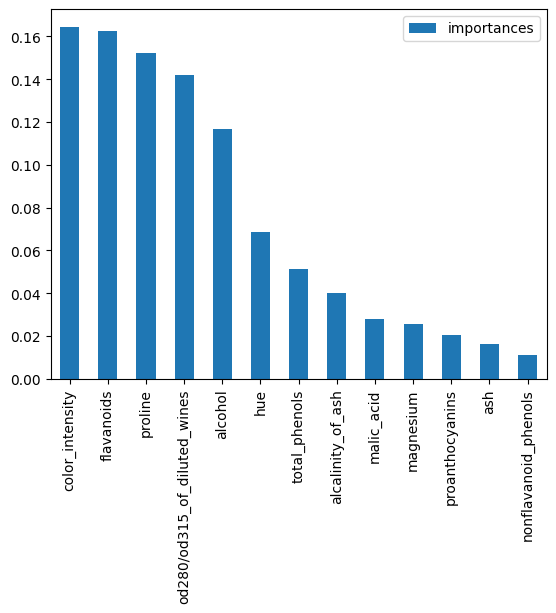

In [86]:
forest = RandomForestClassifier(n_estimators = 500, random_state=1)
forest.fit(X_train, Y_train)
pd.DataFrame(forest.feature_importances_,
             index = X_train.columns, columns = ["importances"]).sort_values(by="importances", ascending=False).plot(kind="bar")

In [101]:
forest.score(X_train, Y_train)

1.0

In [103]:
forest.score(X_test, Y_test)

1.0

In [111]:
forest.predict_proba(X_test)

array([[0.976, 0.012, 0.012],
       [0.932, 0.036, 0.032],
       [0.054, 0.232, 0.714],
       [0.91 , 0.082, 0.008],
       [0.05 , 0.914, 0.036],
       [0.984, 0.012, 0.004],
       [0.006, 0.99 , 0.004],
       [0.008, 0.002, 0.99 ],
       [0.066, 0.928, 0.006],
       [0.186, 0.208, 0.606],
       [0.7  , 0.298, 0.002],
       [0.048, 0.268, 0.684],
       [0.858, 0.114, 0.028],
       [0.012, 0.59 , 0.398],
       [1.   , 0.   , 0.   ],
       [0.006, 0.986, 0.008],
       [0.002, 0.996, 0.002],
       [0.002, 0.996, 0.002],
       [0.954, 0.044, 0.002],
       [0.002, 0.992, 0.006],
       [0.98 , 0.016, 0.004],
       [0.282, 0.672, 0.046],
       [0.014, 0.792, 0.194],
       [0.008, 0.024, 0.968],
       [0.   , 0.038, 0.962],
       [0.   , 0.002, 0.998],
       [0.006, 0.994, 0.   ],
       [0.216, 0.732, 0.052],
       [0.   , 1.   , 0.   ],
       [0.968, 0.032, 0.   ],
       [0.968, 0.032, 0.   ],
       [0.01 , 0.988, 0.002],
       [0.038, 0.068, 0.894],
       [0.

In [ ]:
roc_curve(Y_test.to_numpy(), forest.predict_proba)

Signature:
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array-like of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int, float, bool or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (

In [126]:
confusion_matrix(Y_test, forest.predict(X_test))

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [135]:
from sklearn.model_selection import cross_val_score

In [140]:
X, y = wine_df[wine_df.columns[:-1]], wine_df[["target"]]
cross_val_score(estimator=forest, X = X.to_numpy(), y = y.to_numpy(), cv=5, scoring= "roc_auc")

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/abhishekde/Desktop/

array([nan, nan, nan, nan, nan])

In [137]:
cross_val_score??

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Source:   
def cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch="2*n_jobs",
    error_score=np.nan,
):
    """Evaluate a score by cross-validation.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs), \
            default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups :

### K-nearest neighbors

In [132]:
pipe2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5, p=2))
pipe2.fit(X_train, Y_train)

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [119]:
pipe2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [117]:
pipe2.score(X_train, Y_train)

0.9859154929577465

In [118]:
pipe2.score(X_test, Y_test)

0.9444444444444444

In [133]:
from sklearn.pipeline import Pipeline

In [134]:
Pipeline?

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final estimator only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by setting it to
`'passthrough'` or `None`.

For an example use case of `Pipeline` combined with
:class:`~sklearn.model_selection.GridSearchCV`, refer to
:re

## Breast cancer dataset

In [145]:
bc_dataset = datasets.load_breast_cancer()

In [148]:
bc_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
bc_dataset["data"]

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0